<a href="https://colab.research.google.com/github/Oxpol85/Data-Base-Challenge-Juan-shop/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import locale

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)
pd.options.display.float_format = '{:,.2f}'.format
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


#1. Análisis de facturación



In [18]:
tienda = pd.concat([tienda, tienda_2,tienda_3,tienda_4])
tienda = tienda.drop(['lat', 'lon'], axis=1)
pd.options.display.float_format = '{:,.2f}'.format
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1


In [19]:
# Set locale for currently format
tienda["Precio"] = tienda["Precio"].round(0).astype(int)
tienda['Costo de envío'] = tienda ['Costo de envío'].round(0).astype(int)
tienda_2["Precio"] = tienda_2["Precio"].round(0).astype(int)
tienda_2['Costo de envío'] = tienda_2 ['Costo de envío'].round(0).astype(int)
tienda_3["Precio"] = tienda_3["Precio"].round(0).astype(int)
tienda_3['Costo de envío'] = tienda_3 ['Costo de envío'].round(0).astype(int)
tienda_4["Precio"] = tienda_4["Precio"].round(0).astype(int)
tienda_4['Costo de envío'] = tienda_4 ['Costo de envío'].round(0).astype(int)

# The sum sales stock vs (price-shiping cost) iquial net values operating
sumaVentas = tienda["Precio"].sum()
suma_Ventas = tienda["Costo de envío"].sum()
print(f"Total tienda es: ${sumaVentas-suma_Ventas:,.2f},COP")
sumaVentas2 = tienda_2["Precio"].sum()
suma_Ventas2 = tienda_2["Costo de envío"].sum()
print(f"Total tienda_2 es: ${sumaVentas2-suma_Ventas2:,.2f},COP")
sumaVentas3 = tienda_3["Precio"].sum()
suma_Ventas3 = tienda_3["Costo de envío"].sum()
print(f"Total tienda_3 es: ${sumaVentas3-suma_Ventas3:,.2f},COP")
sumaVentas4 = tienda_4["Precio"].sum()
suma_Ventas4 = tienda_4["Costo de envío"].sum()
print(f"Total tienda_4 es: ${sumaVentas4-suma_Ventas4:,.2f},COP")

Total tienda es: $4,168,922,200.00,COP
Total tienda_2 es: $1,056,858,400.00,COP
Total tienda_3 es: $1,039,503,000.00,COP
Total tienda_4 es: $983,058,300.00,COP


In [20]:
# Calculate the total net sales
TotalNeto = (sumaVentas - suma_Ventas) + (sumaVentas2 - suma_Ventas2) + (sumaVentas3 - suma_Ventas3) + (sumaVentas4 - suma_Ventas4)

print(f"Total tiendas es: ${TotalNeto:,.2f},COP")

Total tiendas es: $7,248,341,900.00,COP


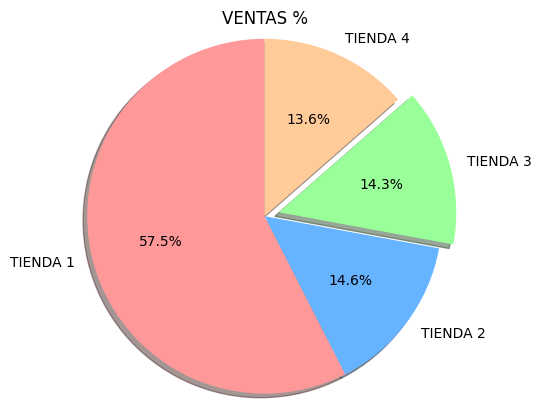

In [21]:
# Coming soon we can apreciate grafic information por more clearance by Stock discriminate
labels = ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4']
# Use the calculated total net sales for each store as numerical values
values = [(sumaVentas - suma_Ventas), (sumaVentas2 - suma_Ventas2), (sumaVentas3 - suma_Ventas3), (sumaVentas4 - suma_Ventas4)]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(values, labels=labels, colors=colors,
        startangle=90, shadow=True, explode=(0, 0, 0.1, 0),
        radius=1.2, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title("VENTAS %")

# Display the plot
plt.show()

# 2. Ventas por categoría

In [22]:
import locale

tiendas = [tienda, tienda_2, tienda_3, tienda_4]
tienda_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for Categoria, tienda in zip(tienda_nombres, tiendas):
    print(f"\n{Categoria}:\n")

    ventasCategoria = tienda.groupby('Categoría del Producto').agg(
        Cantidad_Ventas=('Precio', 'count'),
        Recaudado_Total=('Precio', 'sum')
    ).reset_index().sort_values(by='Cantidad_Ventas', ascending=False)
    print(ventasCategoria, "\n")


Tienda 1:

    Categoría del Producto  Cantidad_Ventas  Recaudado_Total
7                  Muebles             1886        757661000
3             Electrónicos             1772       1660576500
5                 Juguetes             1290         73604400
2        Electrodomésticos             1149       1324751100
1     Deportes y diversión             1113        142977700
4   Instrumentos musicales              753        348772600
6                   Libros              742         37696100
0  Artículos para el hogar              730         57579800 


Tienda 2:

    Categoría del Producto  Cantidad_Ventas  Recaudado_Total
7                  Muebles              442        176426300
3             Electrónicos              422        410831100
5                 Juguetes              313         15945400
2        Electrodomésticos              305        348567800
1     Deportes y diversión              275         34744500
4   Instrumentos musicales              224        10499030

# 3. Calificación promedio de la tienda


RANKIN POR TIENDA
Tienda 1: 4.00
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


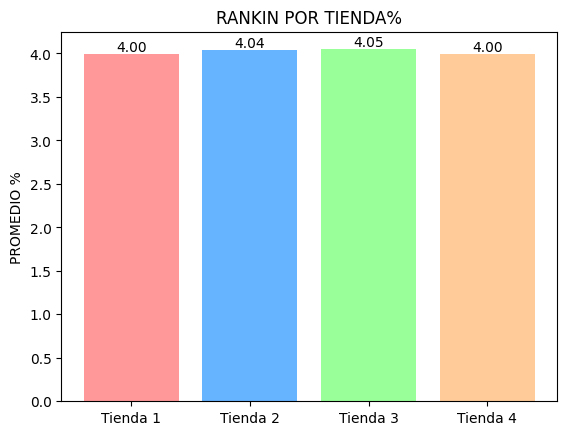

In [23]:
tiendas = [tienda, tienda_2, tienda_3, tienda_4]
tienda_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedio = []

print("RANKIN POR TIENDA")
for nombre, df in zip(tienda_nombres, tiendas):
    average_rating = df['Calificación'].mean()
    print(f"{nombre}: {average_rating:.2f}")
    promedio.append(average_rating)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.bar(tienda_nombres, promedio, color=colors)

plt.ylabel('PROMEDIO %')
plt.title('RANKIN POR TIENDA%')

for i, valor in enumerate(promedio):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# 4. Productos más y menos vendidos


TIENDA 1

Top 5 PRODUCTOS MAS VENDIDOS:
                           CantidadV    TotalR
Producto                                      
Cama box                          62  32946300
Cubertería                        59   2649300
Cama king                         56  37555400
Dashboards con Power BI           56   1990600
Carrito de control remoto         55   4014200

Top 5 PRODUCTOS MENOS VENDIDOS:
                             CantidadV    TotalR
Producto                                        
Ciencia de datos con Python         38   2108800
Refrigerador                        38  75271900
Guitarra acústica                   37  11257100
Armario                             34  16421400
Guitarra eléctrica                  33  25823100


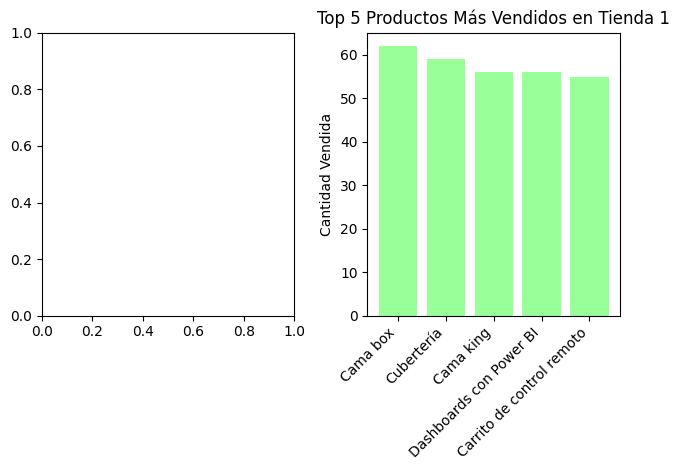

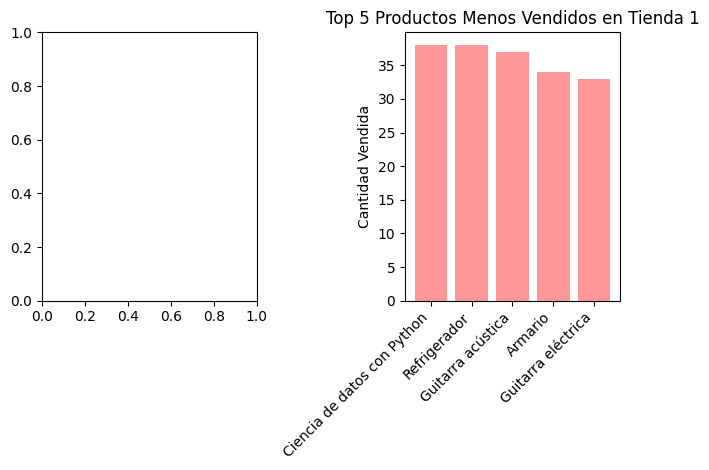


TIENDA 2

Top 5 PRODUCTOS MAS VENDIDOS:
                           CantidadV    TotalR
Producto                                      
Iniciando en programación         65   3127800
Microondas                        62  36192000
Batería                           61  46175300
Pandereta                         58   3725100
Guitarra acústica                 58  18648400

Top 5 PRODUCTOS MENOS VENDIDOS:
                 CantidadV    TotalR
Producto                            
Auriculares             37   3569600
Sillón                  35   8413500
Impresora               34  10385300
Mesa de comedor         34   8637500
Juego de mesa           32   5811900


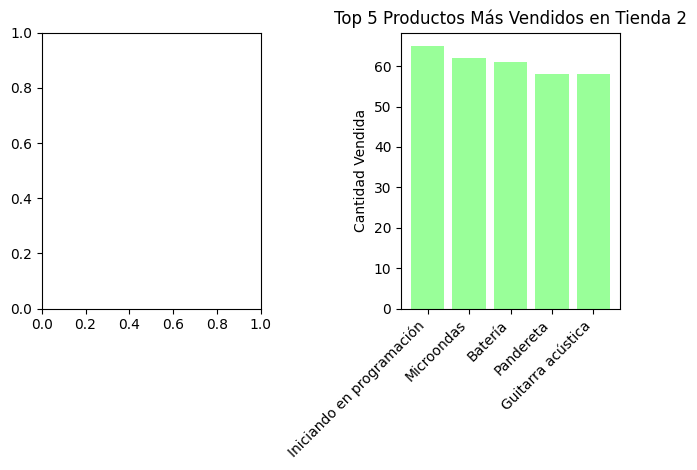

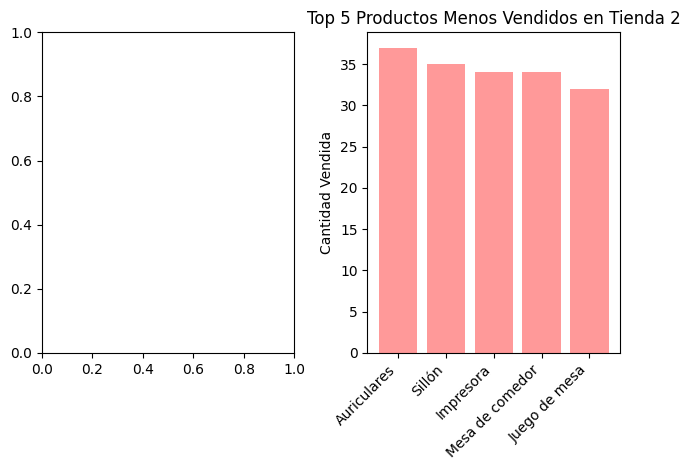


TIENDA 3

Top 5 PRODUCTOS MAS VENDIDOS:
                 CantidadV    TotalR
Producto                            
Kit de bancas           57  16699800
Mesa de comedor         56  14326100
Cama king               56  38834700
Set de ollas            55   8696500
Mesa de noche           55  15365500

Top 5 PRODUCTOS MENOS VENDIDOS:
                         CantidadV    TotalR
Producto                                    
Guitarra eléctrica              38  29848000
Mochila                         36   3547000
Microondas                      36  19153600
Set de vasos                    36   1210700
Bloques de construcción         35   1237200


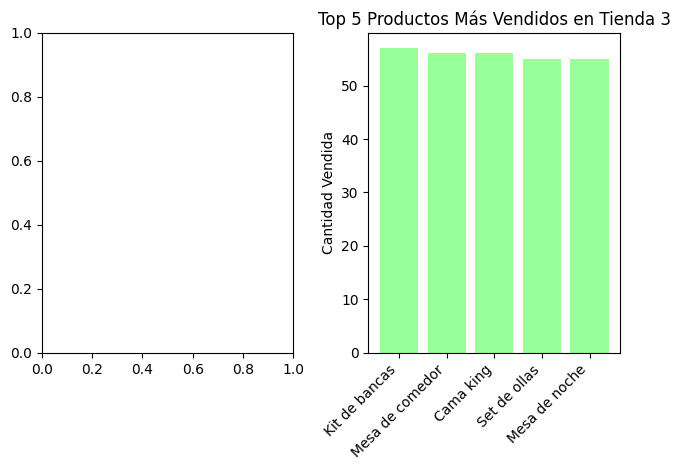

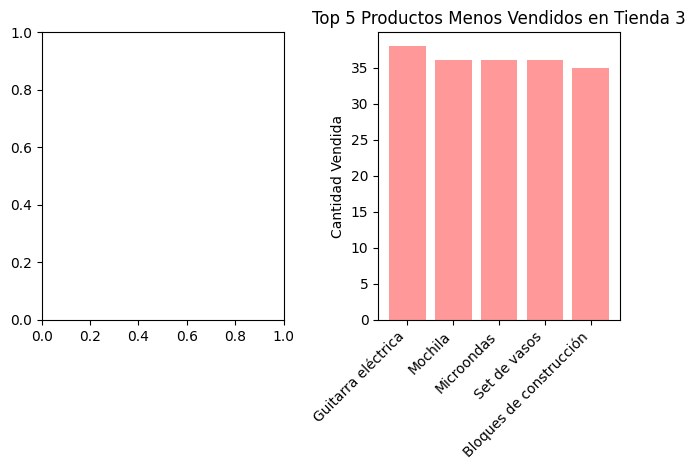


TIENDA 4

Top 5 PRODUCTOS MAS VENDIDOS:
                           CantidadV    TotalR
Producto                                      
Cama box                          62  32946300
Cubertería                        59   2649300
Cama king                         56  37555400
Dashboards con Power BI           56   1990600
Carrito de control remoto         55   4014200

Top 5 PRODUCTOS MENOS VENDIDOS:
                             CantidadV    TotalR
Producto                                        
Ciencia de datos con Python         38   2108800
Refrigerador                        38  75271900
Guitarra acústica                   37  11257100
Armario                             34  16421400
Guitarra eléctrica                  33  25823100


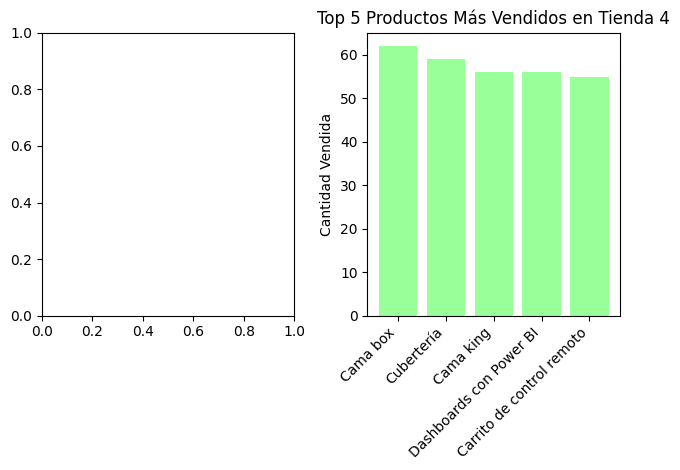

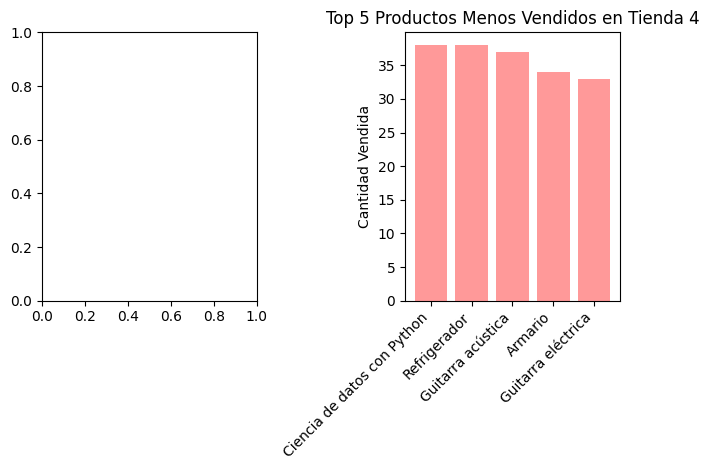

In [24]:
def recaudacion(tienda_nombres, df):
    ventas = df["Producto"].value_counts()
    recaudacion = df.groupby("Producto")["Precio"].sum()

    resumen = pd.DataFrame({
        "CantidadV": ventas,
        "TotalR": recaudacion
    }).sort_values("CantidadV", ascending=False)

    resumen.index = resumen.index.astype(str)

    top_5 = resumen.head(5)
    bottom_5 = resumen.tail(5)

    print(f"\n{tienda_nombres.upper()}")
    print("\nTop 5 PRODUCTOS MAS VENDIDOS:")
    print(top_5)
    print("\nTop 5 PRODUCTOS MENOS VENDIDOS:")
    print(bottom_5)

    # Plotting the top 5 best-selling products

    fig, ax1 = plt.subplots(1,)
    fig, size=(8, 2)
    ax1 = plt.gca()
    plt.bar(top_5.index, top_5['CantidadV'], color='#99ff99')
    plt.ylabel('Cantidad Vendida')
    plt.title(f'Top 5 Productos Más Vendidos en {tienda_nombres}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    # Plotting the bottom 5 least-selling products

    fig, ax2 = plt.subplots(1,2)
    fig, size=(8, 2)
    ax2 = plt.gca()
    plt.bar(bottom_5.index, bottom_5['CantidadV'], color='#ff9999')
    plt.ylabel('Cantidad Vendida')
    plt.title(f'Top 5 Productos Menos Vendidos en {tienda_nombres}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

recaudacion("Tienda 1", tienda)
recaudacion("Tienda 2", tienda_2)
recaudacion("Tienda 3", tienda_3)
recaudacion("Tienda 4", tienda_4)

# 5. Envío promedio por tienda

In [28]:
def calcular_costos_envio_promedio(tienda_nombres, tiendas):
    print("COSTO DE ENVÍO PROMEDIO POR TIENDA")
    for nombre, df in zip(tienda_nombres, tiendas):
        average_shipping_cost = df["Costo de envío"].mean()
        print(f"{nombre}: ${average_shipping_cost:,.2f},COP")

calcular_costos_envio_promedio(tienda_nombres, tiendas)

COSTO DE ENVÍO PROMEDIO POR TIENDA
Tienda 1: $23,459.46,COP
Tienda 2: $25,216.24,COP
Tienda 3: $24,805.68,COP
Tienda 4: $23,459.46,COP
